# Estimation of Pore Pressure using ML

    Pore pressure prediction is a very important area in oil and gas exploration and production and it is done in all basins of the world where exploration wells are drilled for hydrocarbon. Sudden changes in pore pressure when drilling a well and well stability can cause major problems when one is unprepared. So, pore pressure is very important to geophysicists, geologists, petrophysicists, and reservoir engineers. An accurate pore pressure prediction can help us to reduce drilling risk/hazard, to increase wellbore stability, to optimize casing seat selection, and for mud program design.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
well1= pd.read_csv('well 1.csv')
well2= pd.read_csv('well 2.csv')
well3= pd.read_csv('well 3.csv')
well4= pd.read_csv('well 4.csv')
well5= pd.read_csv('well 5.csv')
well6= pd.read_csv('well 6.csv')
well7= pd.read_csv('well 7.csv')
well8= pd.read_csv('well 8.csv')

df= pd.concat([well1,well2,well3,well4,well5,well6,well7,well8])


In [3]:
df

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,3.127835e+05,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,3.149500e+05,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,3.171165e+05,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,3.192830e+05,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,3.214495e+05,1609.0
...,...,...,...,...,...,...,...,...,...,...
1038,181.3026,105.3357,1.8353,1.4914,0.898063,9.9461,51.5604,1.1152,3.260898e+06,1805.0
1039,181.4550,103.8500,1.8245,1.4815,0.876908,9.9117,54.9033,1.1240,3.244434e+06,1805.0
1040,181.6074,103.2400,1.8128,1.4755,0.868221,9.8249,52.2509,1.1346,3.226335e+06,1803.0
1041,181.7598,102.9838,1.7950,1.4691,0.864573,9.8545,53.2176,1.1472,3.197337e+06,1808.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEPTH        11494 non-null  float64
 1   GR           11494 non-null  float64
 2   RHOB         11494 non-null  float64
 3   Vp           11494 non-null  float64
 4   Vsh          11494 non-null  float64
 5   Caliper      11494 non-null  float64
 6   Porosity     11494 non-null  float64
 7   Resistivity  11494 non-null  float64
 8   Stress       11494 non-null  float64
 9   PP           11494 non-null  float64
dtypes: float64(10)
memory usage: 987.8 KB


In [5]:
df.isnull().sum()

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
Stress         0
PP             0
dtype: int64

In [6]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP'],
      dtype='object')

In [7]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP','Stress']

<AxesSubplot:xlabel='DEPTH'>

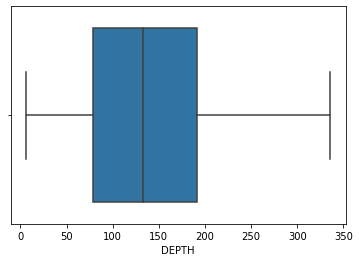

In [8]:
sns.boxplot(x=df['DEPTH'])

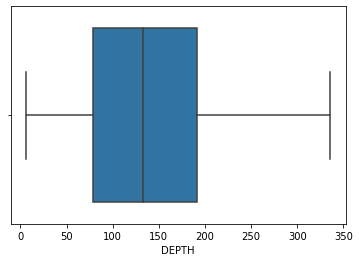

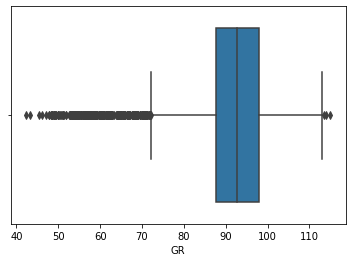

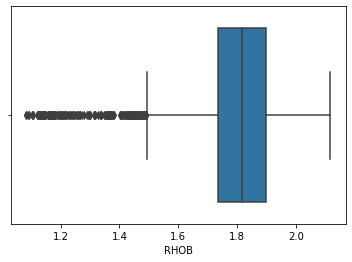

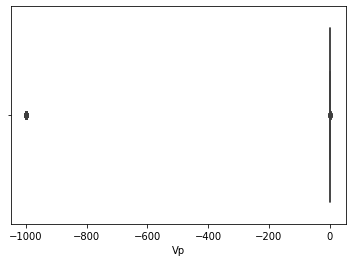

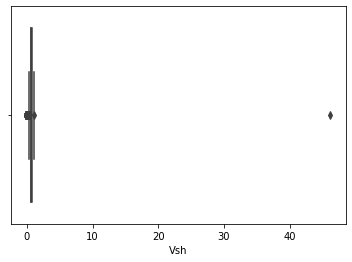

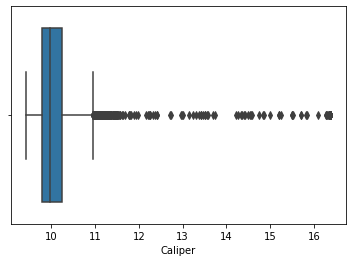

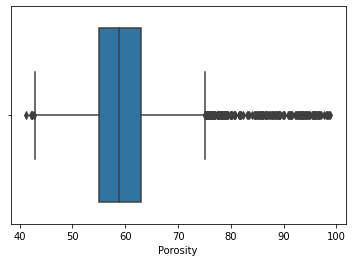

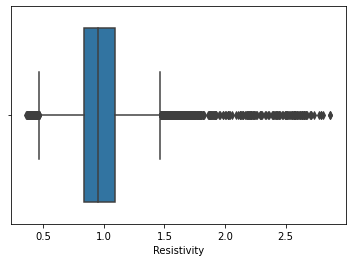

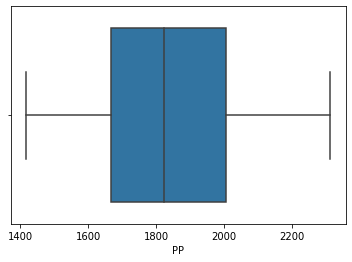

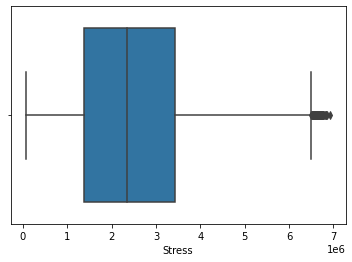

In [9]:
for col in cols :
    plt.figure()
    sns.boxplot(x = df[col])

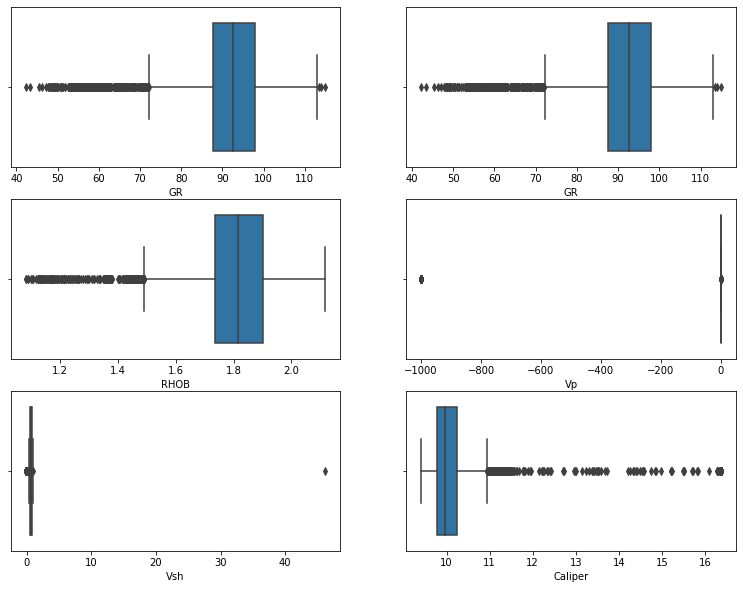

In [11]:
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(x = df['GR'])
#plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(x=df['GR'])
#plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(x=df['RHOB'])
#plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(x=df['Vp'])
#plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(x=df['Vsh'])
#plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(x=df['Caliper'])
#plt.title('After Outlier Removal with One-class SVM', size=15)


plt.show()

In [12]:
# GR
df['GR'][df['GR']<70]= np.nan
# RHOB
df['RHOB'][df['RHOB']<1.5] = np.nan
# Vp
df['Vp'][df['Vp']>1.70] = np.nan
# Vsh
df['Vsh'][df['Vsh']<0.37] = np.nan
# Caliper
df['Caliper'][df['Caliper']>11]= np.nan
# Porosity
df['Porosity'][df['Porosity']>75]= np.nan
# Resistivity
df['Resistivity'][df['Resistivity']>1.5]= np.nan

In [13]:
df= df.dropna()

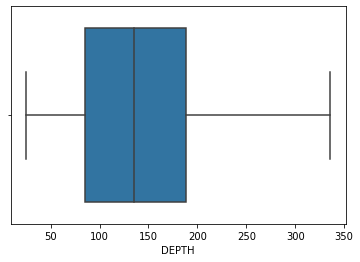

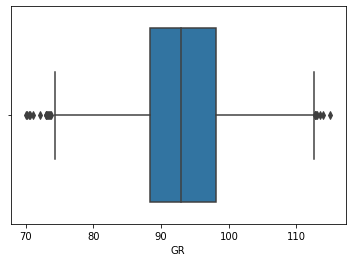

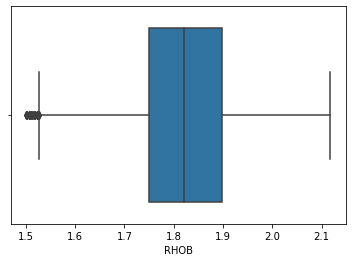

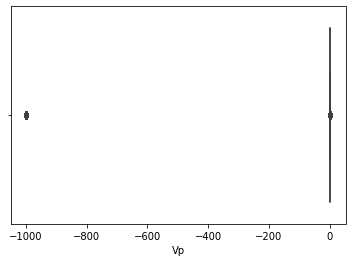

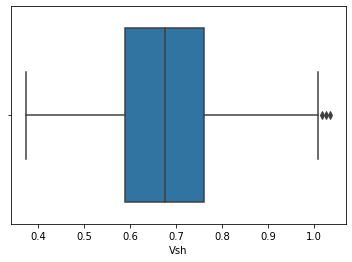

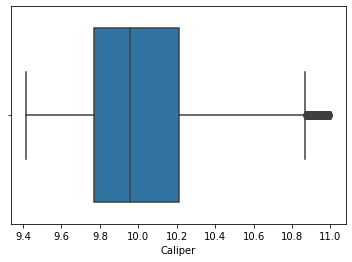

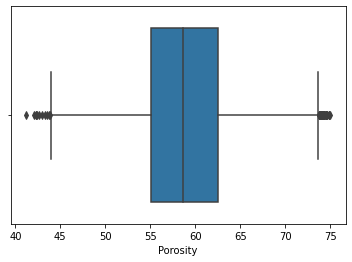

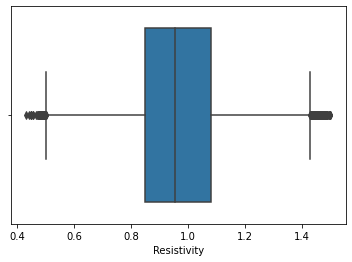

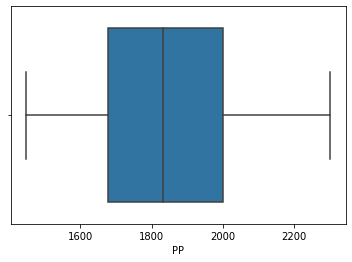

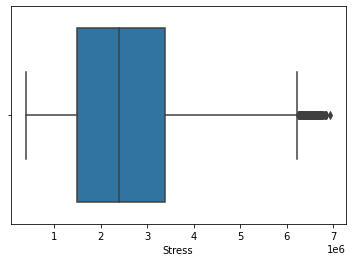

In [14]:
for col in cols :
    plt.figure()
    sns.boxplot(x = df[col])

In [15]:
df.shape

(10408, 10)

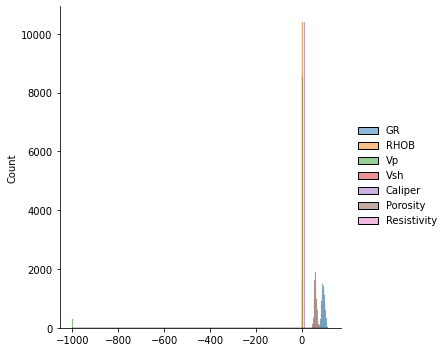

In [18]:
sns.displot(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity','Resistivity']]); #Better to scale these values to (0,1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale= MinMaxScaler()

In [23]:
cols= ['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']

In [21]:
scaled= scale.fit_transform(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']])

### TRAİN

In [24]:
scaled_df= pd.DataFrame(scaled,columns= cols)

In [25]:
df= df.reset_index()

In [26]:
scaled_df

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...
10403,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [27]:
merge= [df['DEPTH'],df['PP'],scaled_df]
pd.concat(merge,axis=1)

,DEPTH,PP,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [28]:
df_scaled= pd.concat(merge,axis=1)

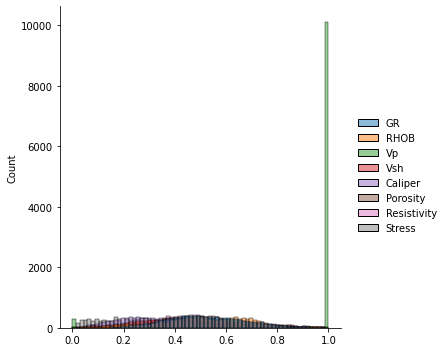

In [30]:
sns.displot(df_scaled[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']]);

<Figure size 600x400 with 0 Axes>

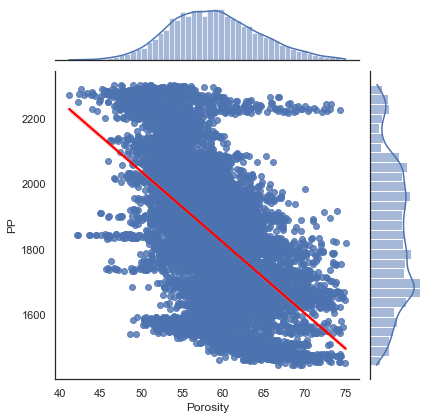

In [34]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Porosity'], y = df['PP'], kind='reg', line_kws={"color": "red"})

<Figure size 600x400 with 0 Axes>

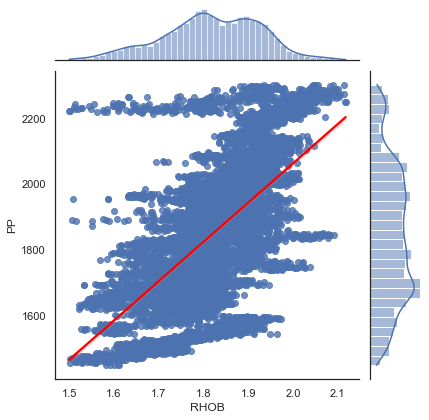

In [35]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['RHOB'], y = df['PP'], kind='reg', line_kws={"color": "red"})

In [36]:
df= df_scaled.drop(['Vp'],axis=1)
df

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.741773,0.277238,0.356041,0.671132,0.428971


In [37]:
df.corr()

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
DEPTH,1.000000,0.709591,0.228171,0.596943,0.183359,-0.470626,-0.529550,0.512857,0.995396
PP,0.709591,1.000000,0.297317,0.618000,0.327807,-0.467341,-0.562232,0.654209,0.725342
GR,0.228171,0.297317,1.000000,0.448181,0.928665,-0.216557,-0.427141,0.200921,0.249181
RHOB,0.596943,0.618000,0.448181,1.000000,0.447860,-0.482734,-0.870870,0.442243,0.653090
Vsh,0.183359,0.327807,0.928665,0.447860,1.000000,-0.237762,-0.435956,0.237863,0.206708
Caliper,-0.470626,-0.467341,-0.216557,-0.482734,-0.237762,1.000000,0.375908,-0.416026,-0.470615
Porosity,-0.529550,-0.562232,-0.427141,-0.870870,-0.435956,0.375908,1.000000,-0.407968,-0.578736
Resistivity,0.512857,0.654209,0.200921,0.442243,0.237863,-0.416026,-0.407968,1.000000,0.522337
Stress,0.995396,0.725342,0.249181,0.653090,0.206708,-0.470615,-0.578736,0.522337,1.000000


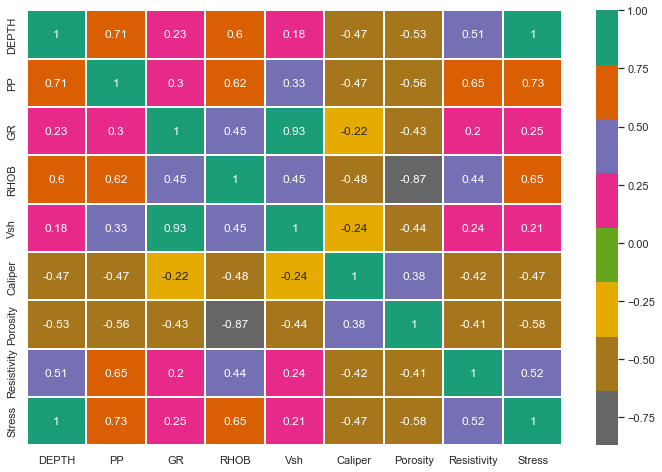

In [38]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x= df.drop(['PP','DEPTH'],axis=1) 
y= df['PP'] 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
print("Training size:",x_train.shape)
print("Testing size:",x_test.shape)

Training size: (8326, 7)
Testing size: (2082, 7)


## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True, normalize = True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
 
train_score = model.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')


Train score of trained model: 66.45814272114728
Test score of trained model: 66.76129338187422


In [44]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-297.43510232  123.38338375  332.52928266  -40.15254195  -46.89092057
  361.05216309  447.15782287]
Linear Model Coefficient (b):  1489.585559720977


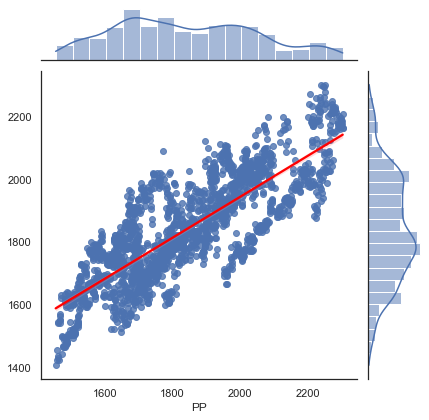

In [45]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

## Plot for observing the predicted and actual values

In [47]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})


table_results

,Metric,Score
0,MSE,14416.857029
1,RMSE,120.070217
2,MAE,93.101311
3,MAPE,5.086101
4,r2,0.667613
5,adj_r2,0.666491


## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)

train_score = ridge.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 66.45790380333642
Test score of trained model: 66.75807209076066


In [50]:
k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2_ridge = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_ridge) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2_ridge, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})

table_results

,Metric,Score
0,MSE,14418.254222
1,RMSE,120.076035
2,MAE,93.063440
3,r2,0.667581
4,adj_r2,0.666459


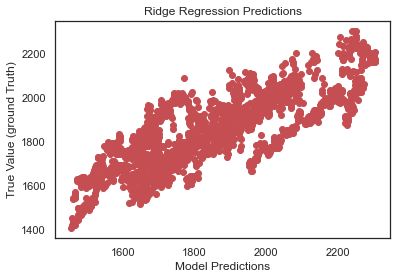

In [51]:
plt.plot(y_test, pred, "o", color = 'r')


plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

## Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [53]:
pred=reg.predict(x_test)

In [54]:
rf_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9505088053370127
Adusted R^2 0.9503417665893555
MAE 25.47989521037463
MSE 2146.616250290008
RMSE 46.33159019815754


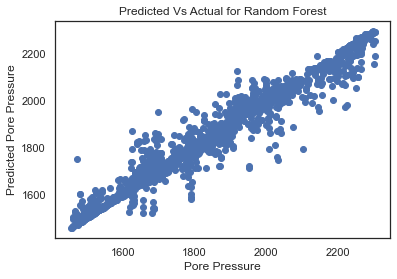

In [55]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

## XGB Regressor

In [56]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
pred=xreg.predict(x_test)

In [58]:
xgb_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9505088053370127
Adusted R^2 0.9325189195561853
MAE 37.20552566914701
MSE 2917.058741698397
RMSE 54.009802274202016


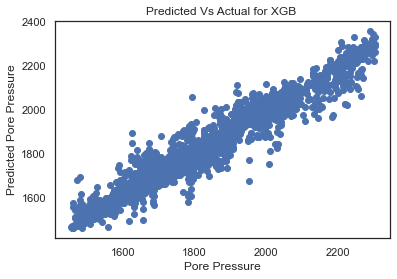

In [59]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for XGB ")
plt.show()

## SVM Regressor

In [60]:
from sklearn import svm

regg=svm.SVR()

In [61]:
regg.fit(x_train,y_train)

SVR()

In [62]:
pred=regg.predict(x_test)

In [63]:
regg_acc=r2_score(y_test, pred)
print("R^2",regg_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.6612173963568495
Adusted R^2 0.6600739642326923
MAE 92.75511959855794
MSE 14694.255154843097
RMSE 121.2198628725635


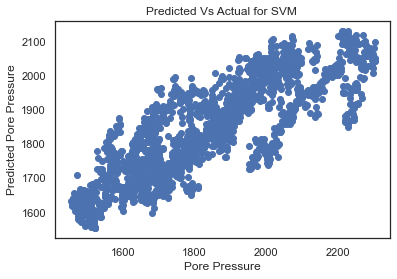

In [64]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()

## ANN

In [66]:
from tensorflow import keras

In [67]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error')

feature_cols = x_train
labels = y_train.values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Epoch 1/100
833/833 [==============================] - 1s 937us/step - loss: 359847.8438
Epoch 2/100
833/833 [==============================] - 1s 917us/step - loss: 19086.4004
Epoch 3/100
833/833 [==============================] - 1s 789us/step - loss: 17783.0918
Epoch 4/100
833/833 [==============================] - 1s 803us/step - loss: 16717.4922
Epoch 5/100
833/833 [==============================] - 1s 796us/step - loss: 15853.9990
Epoch 6/100
833/833 [==============================] - 1s 779us/step - loss: 15141.2500
Epoch 7/100
833/833 [==============================] - 1s 785us/step - loss: 14639.2520
Epoch 8/100
833/833 [==============================] - 1s 837us/step - loss: 14215.6895
Epoch 9/100
833/833 [==============================] - 1s 909us/step - loss: 13798.0312
Epoch 10/100
833/833 [==============================] - 1s 792us/step - loss: 13362.0762
Epoch 11/100
833/833 [==============================] - 1s 1ms/step - loss: 13083.8633
Epoch 12/100
833/833 [=========

In [68]:
pred= model.predict(x_test)

66/66 [==============================] - 0s 633us/step


In [69]:
ann_acc=r2_score(y_test, pred)
print("R^2",ann_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.7337191720869303
Adusted R^2 0.7328204421952276
MAE 83.11966378932517
MSE 11549.584855068228
RMSE 107.46899485464739


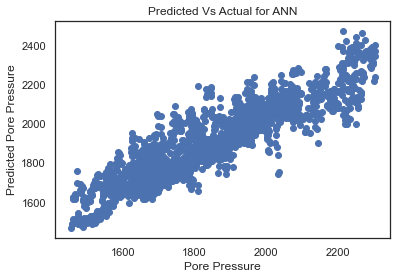

In [70]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for ANN")
plt.show()

In [71]:
models=pd.DataFrame({
    'Model':['Linear Regression','Ridge Regression', 'Random Forest', 'XGBoost', 'Support Vector Machine', 'ANN'],
    'R_squared Score':[r2_linreg*100,r2_ridge*100, rf_acc*100, xgb_acc*100, regg_acc*100, ann_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)


,Model,R_squared Score
2,Random Forest,95.050881
3,XGBoost,93.274591
5,ANN,73.371917
0,Linear Regression,66.761293
1,Ridge Regression,66.758072
4,Support Vector Machine,66.121740


## Hypertuning top performing model

### Random Forest Regressor

In [118]:
from sklearn.model_selection import RandomizedSearchCV

In [119]:
rf = RandomForestRegressor(random_state = 42)

In [120]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Defining the parameters

In [121]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [122]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train,y_train)

In [123]:
#rf_random.best_params_

In [124]:
rf_tuned= RandomForestRegressor(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=100,
 bootstrap= True)

In [125]:
y_train

2124    1897.000
394     1722.000
3101    1713.000
1737    1785.000
561     1770.000
          ...   
5734    1529.500
5191    1645.494
5390    1690.500
860     1854.000
7270    1999.000
Name: PP, Length: 8326, dtype: float64

In [126]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=800)

In [127]:
pred_tunedrf= rf_tuned.predict(x_test)

In [128]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2",rftuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedrf))
print("MSE", mean_squared_error(y_test, pred_tunedrf))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2 0.9513844230702669
Adusted R^2 0.9512203396380066
MAE 25.35269306286036
MSE 2108.6374690533617
RMSE 45.919902755269


In [129]:
depth= np.linspace(30,300,len(x_test))

In [130]:
x_testplot= x_test.copy()

In [131]:
x_testplot['Depth']= depth


In [132]:
x_testplot['Acutal PP']= y_test

In [133]:
x_testplot['Predicted PP']= pred_tunedrf

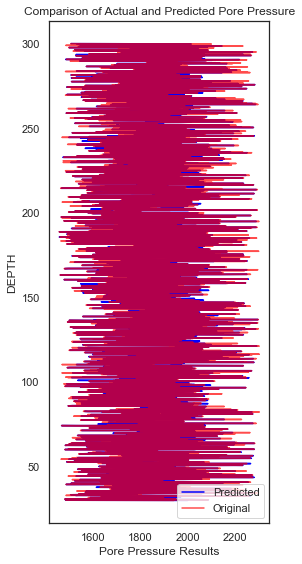

In [134]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

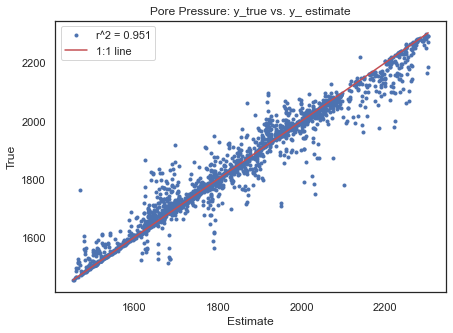

In [135]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedrf, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedrf)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=None, shuffle=False)


predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    rf_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = rf_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(rf, x_train, y_train , cv=10))
    val_score= cross_val_score(rf, x_train, y_train , cv=10)
    
print (score)
print(val_score)

0.9468410529653848
[0.94121488 0.94779191 0.9518191  0.94802317 0.94845326 0.94363272
 0.93488564 0.95025335 0.94671609 0.95562041]


In [137]:
fr_val_score= val_score

In [138]:
rf_score_df= pd.DataFrame(fr_val_score)
rf_score_df= rf_score_df.reset_index()
rf_score_df

,index,0
0,0,0.941215
1,1,0.947792
2,2,0.951819
3,3,0.948023
4,4,0.948453
5,5,0.943633
6,6,0.934886
7,7,0.950253
8,8,0.946716
9,9,0.955620


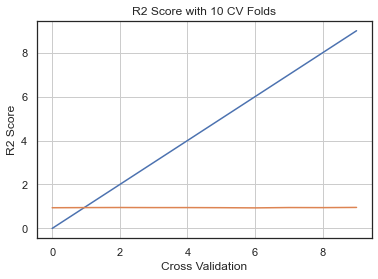

In [139]:
plt.plot(rf_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

## XG Boost Regressor

In [91]:
xgbr=XGBRegressor()

In [92]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [93]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [94]:
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [95]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_ca...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [97]:
clf.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7999999999999999}

In [98]:
xgb_tuned= XGBRegressor(subsample= 0.7,
 n_estimators=500,
max_depth=15,
 learning_rate= 0.1,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel= 0.6)

In [99]:
xgb_tuned.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=1,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=15, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [100]:
pred_tunedxgb= xgb_tuned.predict(x_test)

In [101]:
xgbtuned_acc=r2_score(y_test, pred_tunedxgb)
print("R^2",xgbtuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedxgb))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedxgb))
print("MSE", mean_squared_error(y_test, pred_tunedxgb))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedxgb)))

R^2 0.9423006774542029
Adusted R^2 0.9421059352855333
MAE 33.0004308957733
MSE 2502.633130013362
RMSE 50.026324370408844


In [102]:
x_testplot['Predicted PP xgb']= pred_tunedxgb

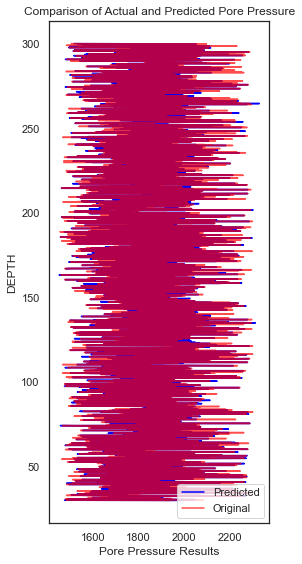

In [103]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP xgb"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

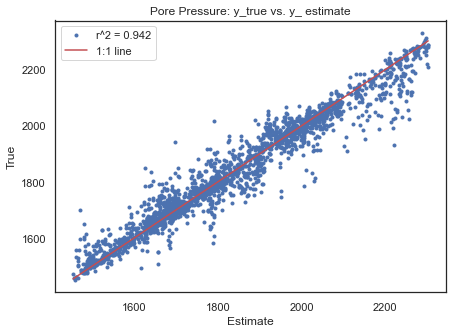

In [104]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedxgb, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedxgb)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=None, shuffle=False)


predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    xgb_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = xgb_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(xgb_tuned, x_train, y_train , cv=10))
    val_score= cross_val_score(xgb_tuned, x_train, y_train , cv=10)
    
print (score)
print(val_score)

0.9389172173757314
[0.93378709 0.93653682 0.94680727 0.94172173 0.94019783 0.94113309
 0.92671356 0.93958131 0.93729544 0.94539805]


In [140]:
xgb_score_df= pd.DataFrame(val_score)
rf_score_df= rf_score_df.reset_index()
xgb_score_df

,0
0,0.941215
1,0.947792
2,0.951819
3,0.948023
4,0.948453
5,0.943633
6,0.934886
7,0.950253
8,0.946716
9,0.955620


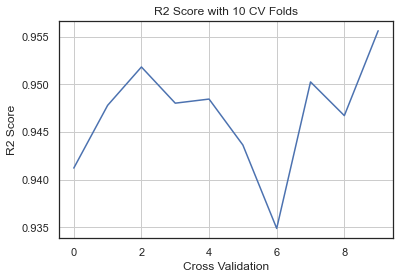

In [141]:
plt.plot(xgb_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

### Using PyCaret

In [142]:
from pycaret.regression import *

In [143]:
df

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.741773,0.277238,0.356041,0.671132,0.428971


In [144]:
df=  df.drop(['DEPTH'],axis=1)

In [146]:
model= setup(data= df, target= 'PP',normalize= True,remove_outliers=True,profile=True)

,Description,Value
0,Session id,8037
1,Target,PP
2,Target type,Regression
3,Data shape,"(10114, 8)"
4,Train data shape,"(7002, 8)"
5,Test data shape,"(3123, 8)"
6,Numeric features,7
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


Loading profile... Please Wait!


In [147]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28.0766,2121.3139,45.9714,0.9512,0.0248,0.0152,0.3750
rf,Random Forest Regressor,29.3191,2585.1310,50.7312,0.9405,0.0274,0.0159,0.5500
lightgbm,Light Gradient Boosting Machine,40.1651,3388.0538,58.1465,0.9221,0.0317,0.0220,0.0670
xgboost,Extreme Gradient Boosting,40.5668,3385.1417,58.1431,0.9220,0.0316,0.0222,0.4690
knn,K Neighbors Regressor,40.6578,4552.1124,67.2814,0.8955,0.0366,0.0223,0.0350
dt,Decision Tree Regressor,31.0791,6042.1156,77.5986,0.8605,0.0416,0.0168,0.0360
gbr,Gradient Boosting Regressor,61.6115,6431.4962,80.1539,0.8517,0.0434,0.0336,0.3360
ada,AdaBoost Regressor,91.9898,11547.9885,107.4353,0.7342,0.0580,0.0503,0.1650
lar,Least Angle Regression,94.0627,14640.8706,120.9731,0.6628,0.0656,0.0516,0.0250
br,Bayesian Ridge,94.0321,14641.5822,120.9759,0.6628,0.0656,0.0515,0.0250


ExtraTreesRegressor(n_jobs=-1, random_state=8037)

In [148]:
et= create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.8190,2475.6771,49.7562,0.9441,0.0274,0.0164
1,29.8918,2499.5089,49.9951,0.9422,0.0268,0.0161
2,28.0798,2245.6054,47.3878,0.9513,0.0257,0.0153
3,26.9218,1835.0017,42.8369,0.9596,0.0230,0.0145
4,26.3906,1873.2215,43.2807,0.9535,0.0234,0.0144
5,27.7141,2104.5194,45.8750,0.9529,0.0243,0.0149
6,28.8794,2187.8469,46.7744,0.9523,0.0253,0.0158
7,29.4199,2163.9124,46.5179,0.9475,0.0251,0.0159
8,28.2132,2176.4247,46.6522,0.9477,0.0244,0.0150


In [149]:
tuned_et= tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,71.2159,9275.3679,96.3087,0.7904,0.0523,0.0391
1,71.9997,9226.7605,96.0560,0.7868,0.0515,0.0391
2,70.6681,9166.2243,95.7404,0.8014,0.0516,0.0386
3,66.4882,8060.1218,89.7782,0.8224,0.0481,0.0361
4,69.8172,8950.3766,94.6064,0.7780,0.0505,0.0378
5,72.0389,9648.2244,98.2254,0.7842,0.0523,0.0390
6,73.1502,9655.0529,98.2601,0.7895,0.0527,0.0399
7,68.1715,8755.3510,93.5700,0.7875,0.0502,0.0369
8,67.3098,8987.6327,94.8031,0.7842,0.0502,0.0363


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


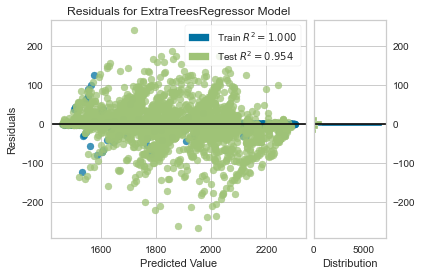

In [151]:
plot_model(tuned_et)

In [152]:
predictions= tuned_et.predict(x_test)

In [153]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [154]:
et_acc=r2_score(y_test, predictions)
print("R^2",et_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, predictions))
print("MSE", mean_squared_error(y_test, predictions))
print("RMSE",np.sqrt(mean_squared_error(y_test, predictions)))

R^2 0.09158733428139831
Adusted R^2 0.08852133203451773
MAE 162.4683421147034
MSE 39401.21881234677
RMSE 198.4974025329973


In [155]:
x_testplot['Predicted PP et']= predictions

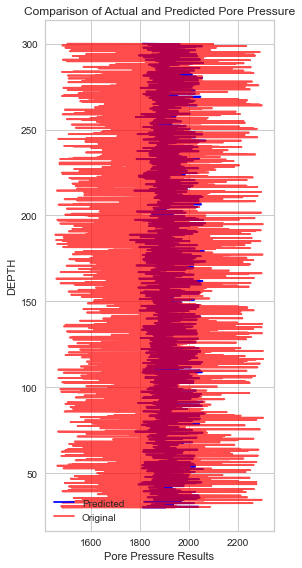

In [156]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP et"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()